## Web Pages, Web Requests, and Parsing

# 3.3 GHz -> 0.3 ns

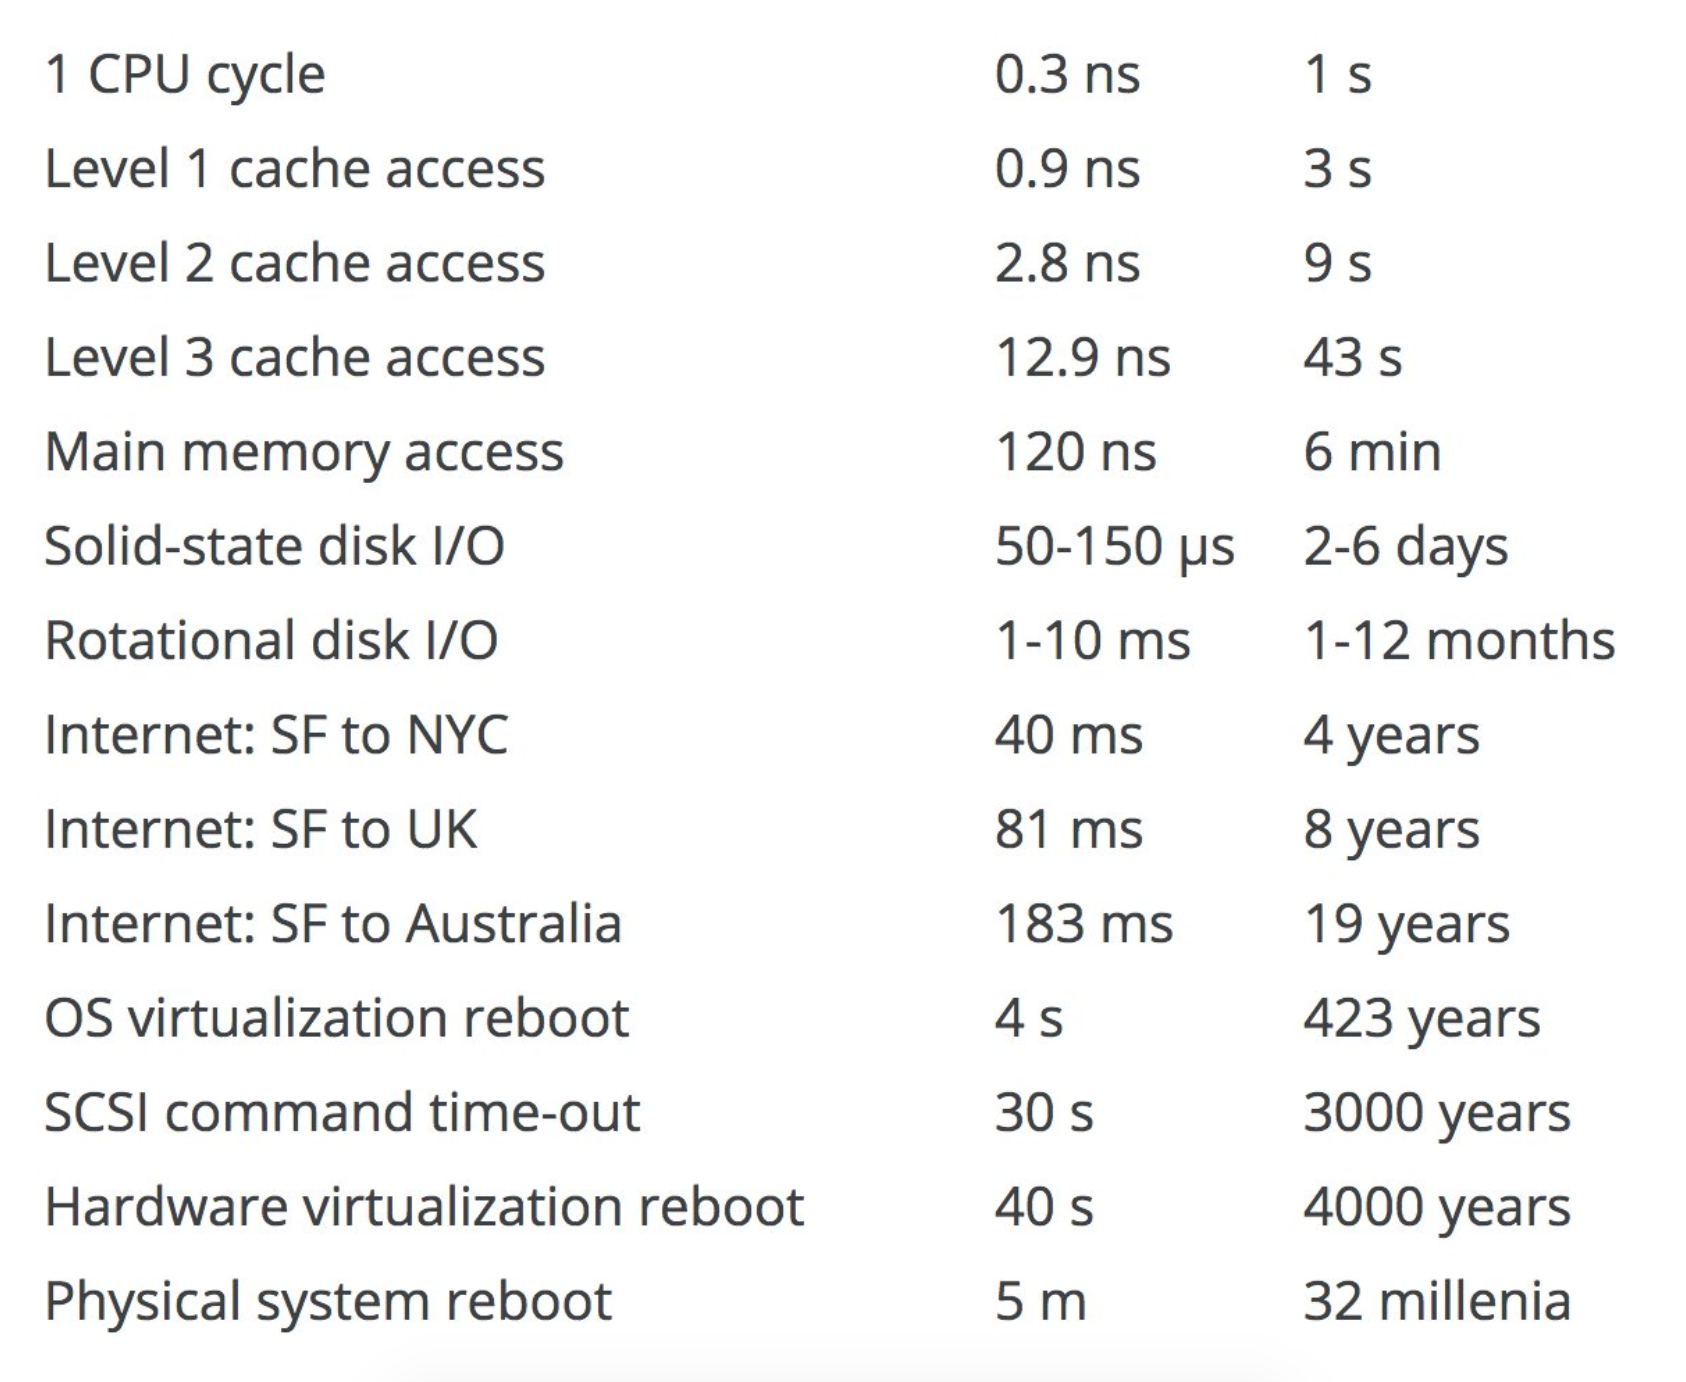

```
<!doctype html>
<html lang=en>
    <head>
        <meta charset=utf-8>
        <title>My Title</title>
    </head>
    <body>
        <p>I'm some content.</p>
        <p>
            <ul>
                <li>I'm a <a href="https://www.google.com">link</a>!</li>
            </ul>
        </p>
    </body>
</html>
```

- Save snippet to .html file on LFS.
- Open NY Times page.
- Open google.com

In [ ]:
import requests  # Defacto web request library in Python ecosystem

response = requests.get('https://google.com')  # the requests library will make send a GET request
response

In [ ]:
response.content.decode('latin1')  # still need to decode the response's content

##### Exercises

1. Using requests, fetch a website page not covered in lecture. Convert the content returned into a string (not a bytestring) and bind that value to a new variable named `content`.

In [ ]:
import requests

content = requests.get('https://twitter.com').content.decode('utf-8')

In [ ]:
import bs4  # Beautiful Soup library helps us parse the content into objects. 

response = requests.get('https://google.com')
soup = bs4.BeautifulSoup(response.content, 'html.parser')

In [ ]:
dir(soup)

In [ ]:
soup.find_all('a')  # Give us all the link elements as link objects.

In [ ]:
[a['href'] for a in soup.find_all('a')]

In [ ]:
response = requests.get('https://www.nytimes.com/')
soup = bs4.BeautifulSoup(response.content, 'html.parser')

In [ ]:
soup

In [ ]:
texts = [a.text.strip().lower() for a  in soup.find_all('a')]
text = ' '.join(' '.join(texts).split())
text

In [ ]:
pull_chars = '»©\n'
for pull_char in pull_chars:
    text = text.replace(pull_char, '')
text

In [ ]:
import collections

counter = collections.Counter(text.split())

In [ ]:
counter.most_common(20)

In [ ]:
!pip install nltk

In [ ]:
import nltk; nltk.download()  # d, Enter, stopwords, Enter, q

In [ ]:
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
stops

In [ ]:
counts = [(word, count) for word, count in counter.most_common() 
          if word not in stops]
counts

- classes
- ids
- element types
- text of element

In [ ]:
soup.find_all('span')  # Let's get all of the span elements from the NYTimes.com page

##### Exercises

1. Make a GET request to the times web page. Collect all of the headers from that page.


In [ ]:
import requests
import bs4

resp = requests.get('https://www.nytimes.com/')
soup = bs4.BeautifulSoup(resp.content, 'html.parser')

In [ ]:
soup.find_all('h1') + soup.find_all('h2') + soup.fin_all('h3')  # This can produce TypeErrors and looks ugly

In [ ]:
import re

pattern = re.compile("h\d{1}")
soup.find_all(pattern)

##### Exercises

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

1. Create a function `fetch_by_id` that fetches the contents of a specific URL and searches that content for an elment with a given ID. The function should take the URL and element ID and should return the text of the element or `None`. Handle any attribute exceptions due to the element not having a `text` attribute.

```python
>>> fetch_by_id('https://example.com/testpage.html', 'test-elem')
'This is a test element'
```

In [ ]:
import bs4
import requests


def fetch_by_id(url, elem_id):
    response = requests.get(url)
    soup = bs4.BeautifulSoup(response.content, 'html.parser')
    try:
        return soup.find(id=elem_id).text
    except AttributeError:
        return

fetch_by_id('https://nytimes.com', 'clear-search-input')

##### JSON


```
{
  "array": [
    1,
    2,
    3
  ],
  "boolean": true,
  "null": null,
  "number": 123,
  "object": {
    "a": "b",
    "c": "d",
    "e": "f"
  },
  "string": "Hello World"
}
```
- Reference: http://www.json.org/
- Example: https://jsonblob.com/

In [ ]:
import requests

# MEGABUS API
response = requests.get('https://us.megabus.com/journey-planner/api/destination-cities?originCityId=123')

In [ ]:
response.content

In [ ]:
import json

data = json.loads(response.content.decode())
data['cities']

In [ ]:
print('{:3} {}'.format('id', 'name'))
for city in data['cities']:
    print('{:3} {}'.format(city.get('id'), city.get('name')))

##### URL broken over two lines

```
https://us.megabus.com/journey-planner/api/journeys?
originId=123&destinationId=127&departureDate=2018-04-29&totalPassengers=1
```

In [ ]:
import urllib.parse
import requests


def get_journey_url(origin_code, 
                    destination_code,
                    depatrure_date, 
                    passenger_count):
    query = {
        'originId': origin_code,
        'destinationId': destination_code,
        'departureDate': depatrure_date,
        'totalPassengers': passenger_count,
    }
    query_string = urllib.parse.urlencode(query)
    base_url = 'https://us.megabus.com/journey-planner/api/journeys?'
    return base_url + query_string

In [ ]:
journey_url = get_journey_url(123, 127, '2018-04-29', 1)
journey_url

In [ ]:
response = requests.get(journey_url)
response.json()